In [16]:
pip install pandas matplotlib

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


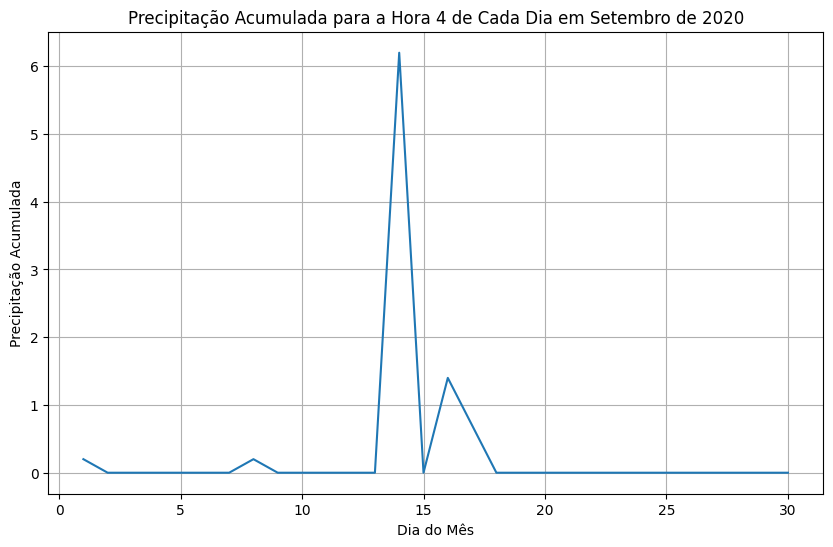


A precipitação acumulada para a hora 4 de cada dia em setembro de 2020 é 8.0 mm.
O número de medidas inválidas/ausentes em 2016 é 343.


In [25]:
from google.colab import drive
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
caminho='/content/gdrive/MyDrive/'
dataset='ds_chuva_sm_2011_2020_10.csv'
caminho_dataset=caminho+dataset

# Carregar os dados
df = pd.read_csv(caminho_dataset, sep=';', decimal=',')
df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'], format='%Y-%m-%d')

# Filtrar dados para setembro de 2020 e hora 4
filtered_df = df[(df['DT_MEDICAO'].dt.year == 2020) &
                 (df['DT_MEDICAO'].dt.month == 9) &
                 (df['HR_MEDICAO'] <= 400)]

# Calcular precipitação acumulada
accumulated_rain = filtered_df.groupby(filtered_df['DT_MEDICAO'].dt.day)['CHUVA'].sum()

# Plotar os dados
plt.figure(figsize=(10,6))
plt.plot(accumulated_rain.index, accumulated_rain.values)
plt.xlabel('Dia do Mês')
plt.ylabel('Precipitação Acumulada')
plt.title('Precipitação Acumulada para a Hora 4 de Cada Dia em Setembro de 2020')
plt.grid(True)
plt.show()

accumulated_rain = round(filtered_df['CHUVA'].sum(), 2)
print("")
print(f"A precipitação acumulada para a hora 4 de cada dia em setembro de 2020 é {accumulated_rain} mm.")

# Filtrar dados do ano de 2016
df_2016 = df[df['DT_MEDICAO'].dt.year == 2016]

# Calcule o número de medidas faltantes

num_missing = df_2016['CHUVA'].isnull().sum()

print(f"O número de medidas inválidas/ausentes em 2016 é {num_missing}.")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


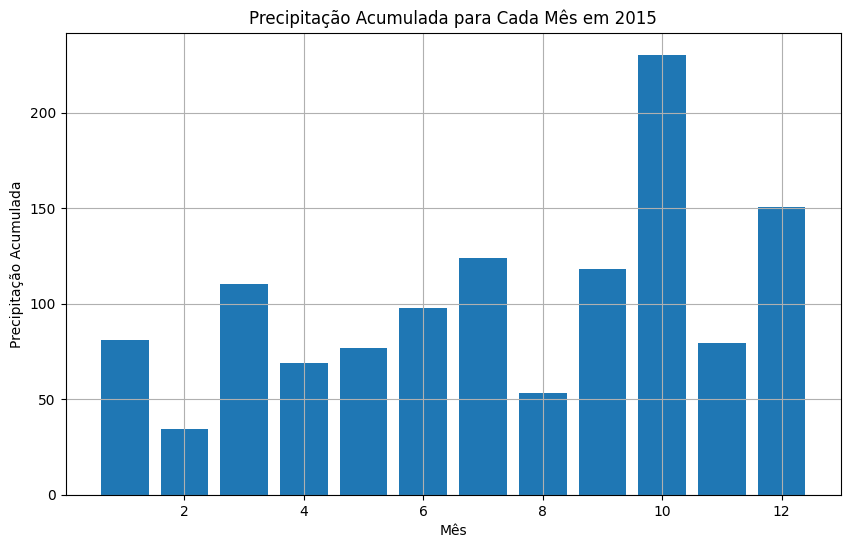